In [1]:
import csv
import json
from pprint import PrettyPrinter
import datetime
import pandas as pd
from pymongo import MongoClient
from datetime import datetime as dt

In [3]:
def wrangle(filepthcsv, filepathjson):
    # Charger le fichier CSV
    fcsv = filepthcsv
    #charger le repertoire ou le fichier JSON creer sera enregistrer
    fjson = filepathjson
    data = []
    with open(fcsv) as csvfile:
        for row in csv.DictReader(csvfile):
            data.append(row)
    df= pd.DataFrame(data)
    df[['sensor_id','sensor_type','location','lat','lon','timestamp','value_type','value']] = df['sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value'].str.split(';', expand= True)
    df.drop(columns='sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value', inplace=True)
    #df[['sensor_id','location']]= df[['sensor_id','location']].astype('Int64')
    #df[['lat','lon','value']]= df[['lat','lon','value']].astype('float')
    data_dict = {}
    dataset = []
    for i in range(len(df)):
            value_type =df['value_type'][i]
            data_dict= {
            f"{value_type}":df['value'][i],
            'timestamp': df['timestamp'][i],
            'metadonnees':{
                        'lat':df['lat'][i],
                        'lon':df['lon'][i],
                        'mesure':df['value_type'][i],
                        'sensor_id':df['sensor_id'][i],
                        'sensor_type': df['sensor_type'][i],
                        'location': df['location'][i]
                    }
                }
            dataset.append(data_dict)
    ##dataset_list= []
    #for j in range(len(dataset)):
        #dataset_list.append(dataset[j].values())
        
    #dataset=   list(data_dict.values())
    # Enregistrer le fichier JSON
    with open(fjson, 'w') as jsonFile:
        jsonFile.write(json.dumps(dataset))
        print("JSON enregistrer!")

In [5]:
wrangle('C:/Users/hp/Documents/MASTER/Projets tutorés/dataset/october_2018_sensor_data_archive.csv','C:/Users/hp/Documents/MASTER/Projets tutorés/dataset/jsonfiles/october_2018_sensor_data_archive.json')

JSON enregistrer!


In [6]:
pathcsv= [
    'C:/Users/hp/Documents/MASTER/Projets tutorés/dataset/september_2018_sensor_data_archive.csv',
    'C:/Users/hp/Documents/MASTER/Projets tutorés/dataset/october_2018_sensor_data_archive.csv',
    'C:/Users/hp/Documents/MASTER/Projets tutorés/dataset/november_2018_sensor_data_archive.csv',
    'C:/Users/hp/Documents/MASTER/Projets tutorés/dataset/december_2018_sensor_data_archive.csv'
]
pathjson = [
    'C:/Users/hp/Documents/MASTER/Projets tutorés/dataset/jsonfiles/september_2018_sensor_data_archive.csv',
    'C:/Users/hp/Documents/MASTER/Projets tutorés/dataset/jsonfiles/october_2018_sensor_data_archive.csv',
    'C:/Users/hp/Documents/MASTER/Projets tutorés/dataset/jsonfiles/november_2018_sensor_data_archive.csv',
    'C:/Users/hp/Documents/MASTER/Projets tutorés/dataset/jsonfiles/december_2018_sensor_data_archive.csv'
]

In [7]:
wrangle('C:/Users/hp/Documents/MASTER/Projets tutorés/dataset/september_2018_sensor_data_archive.csv','C:/Users/hp/Documents/MASTER/Projets tutorés/dataset/jsonfiles/september_2018_sensor_data_archive.csv')
wrangle('C:/Users/hp/Documents/MASTER/Projets tutorés/dataset/october_2018_sensor_data_archive.csv','C:/Users/hp/Documents/MASTER/Projets tutorés/dataset/jsonfiles/october_2018_sensor_data_archive.csv')
wrangle('C:/Users/hp/Documents/MASTER/Projets tutorés/dataset/november_2018_sensor_data_archive.csv','C:/Users/hp/Documents/MASTER/Projets tutorés/dataset/jsonfiles/november_2018_sensor_data_archive.csv')
wrangle('C:/Users/hp/Documents/MASTER/Projets tutorés/dataset/december_2018_sensor_data_archive.csv','C:/Users/hp/Documents/MASTER/Projets tutorés/dataset/jsonfiles/december_2018_sensor_data_archive.csv')

AttributeError: 'str' object has no attribute 'DictReader'

In [175]:
#Importer le fichier JSON sur MongoDB
client = MongoClient('localhost', 27017)
db = client['airquality'] #remplacer par le nom de la base
collection_currency = db['nairobie9']#remplacer /nom collection
#with open(fjson) as f:
    #file_data = json.load(f)

with open('C:/Users/hp/Documents/MASTER/Projets tutorés/dataset/json/october_2018_sensor_data_archive.json', 'r') as content_file:
    content = content_file.read()
records = json.loads(content)
# utiliser collection_currency.insert(file_data) si la version de pymongo est < 3.0
collection_currency.insert_many(records)
client.close()
print('Fichier Importer avec succes!!')

Fichier Importer avec succes!!


In [176]:
pp =  PrettyPrinter(indent=2)
client = MongoClient(host="localhost",port=27017)

In [177]:
pp.pprint(list(client.list_databases()))

[ {'empty': False, 'name': 'admin', 'sizeOnDisk': 40960},
  {'empty': False, 'name': 'airquality', 'sizeOnDisk': 175550464},
  {'empty': False, 'name': 'bdtest', 'sizeOnDisk': 225280},
  {'empty': False, 'name': 'config', 'sizeOnDisk': 110592},
  {'empty': False, 'name': 'local', 'sizeOnDisk': 188416}]


In [178]:
db = client["airquality"]

In [180]:
for c in db.list_collections():
    print(c["name"])

nairobie5
nairobie6
movie
nairobie3
nairobie8
nairobie9
nairobi
nairobi0418
nairobie7
nairobie4


In [181]:
nairobi = db["nairobie9"]

In [182]:
nairobi.count_documents({})

1068647

In [183]:
result = nairobi.find_one({})
pp.pprint(result)

{ 'P1': '11.40',
  '_id': ObjectId('65b7f81ef7853ae1cf8c750e'),
  'metadonnees': { 'lat': '-1.291',
                   'location': '31',
                   'lon': '36.781',
                   'mesure': 'P1',
                   'sensor_id': '59',
                   'sensor_type': 'SDS011'},
  'timestamp': '2018-10-01T00:00:10.061077+00:00'}


In [184]:
site= nairobi.distinct("metadonnees.location")
site

['18',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '37',
 '38',
 '40',
 '41',
 '44',
 '46',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '6',
 '7',
 '8']

In [185]:
for i in site: 
    print(f'Documents du Site {i}:', nairobi.count_documents({"metadonnees.location":f'{i}'}))

Documents du Site 18: 39618
Documents du Site 25: 33172
Documents du Site 26: 30616
Documents du Site 27: 69038
Documents du Site 28: 29384
Documents du Site 29: 70728
Documents du Site 30: 39438
Documents du Site 31: 66044
Documents du Site 32: 66010
Documents du Site 33: 20084
Documents du Site 34: 62518
Documents du Site 35: 18044
Documents du Site 37: 48054
Documents du Site 38: 4652
Documents du Site 40: 10968
Documents du Site 41: 33620
Documents du Site 44: 7780
Documents du Site 46: 61506
Documents du Site 48: 61732
Documents du Site 49: 20352
Documents du Site 50: 9960
Documents du Site 51: 1754
Documents du Site 52: 3470
Documents du Site 53: 1050
Documents du Site 6: 60478
Documents du Site 7: 198474
Documents du Site 8: 103


In [172]:
nairobi.distinct("metadonnees.mesure")

['P1', 'P2', 'humidity', 'temperature']

In [36]:
sensor_type= nairobi.distinct("metadonnees.sensor_type")
sensor_type

['DHT22', 'SDS011']

In [37]:
for i in site: 
    result = nairobi.aggregate(
        [
            {"$match": {"metadonnees.sensor_id":f'{i}'}},
            {"$group": {"_id": "$metadonnees.location", "count":{"$count":{}}}}
        ]
    )
    pp.pprint(f' Dans le Site {i}: {list(result)}')

(" Dans le Site 16: [{'_id': 'SDS011', 'count': 894}, {'_id': 'DHT22', "
 "'count': 884}]")
" Dans le Site 21: [{'_id': 'DHT22', 'count': 2}]"
" Dans le Site 25: [{'_id': 'SDS011', 'count': 31862}]"
(" Dans le Site 26: [{'_id': 'SDS011', 'count': 30836}, {'_id': 'DHT22', "
 "'count': 5224}]")
(" Dans le Site 6: [{'_id': 'SDS011', 'count': 1526}, {'_id': 'DHT22', "
 "'count': 1454}]")
" Dans le Site 7: [{'_id': 'SDS011', 'count': 30390}]"
(" Dans le Site 8: [{'_id': 'SDS011', 'count': 15300}, {'_id': 'DHT22', "
 "'count': 21262}]")


In [39]:
result = nairobi.find(
    {"metadonnees.location":'16'},
    projection={"P2": 1, "P1": 1, "timestamp":1, "humidity":1, "temperature":1 , "_id": 0}
)
#pp.pprint(result.next())
df_pa = pd.DataFrame(result)

In [40]:
df_pa.head(30)

,P2,timestamp,P1,humidity,temperature
0,49.03,2018-06-08T10:06:11.188304+00:00,NaN,NaN,NaN
1,NaN,2018-06-08T10:06:11.188304+00:00,54.60,NaN,NaN
2,52.03,2018-06-08T10:12:33.940972+00:00,NaN,NaN,NaN
3,NaN,2018-06-08T10:12:33.940972+00:00,57.25,NaN,NaN
4,52.03,2018-06-08T10:12:43.093913+00:00,NaN,NaN,NaN
5,NaN,2018-06-08T10:12:43.093913+00:00,57.25,NaN,NaN
6,NaN,2018-06-08T10:12:52.254260+00:00,NaN,45.40,NaN
7,NaN,2018-06-08T10:12:52.254260+00:00,NaN,NaN,30.90
8,NaN,2018-06-08T10:13:05.215055+00:00,NaN,45.40,NaN
9,NaN,2018-06-08T10:13:05.215055+00:00,NaN,NaN,30.90


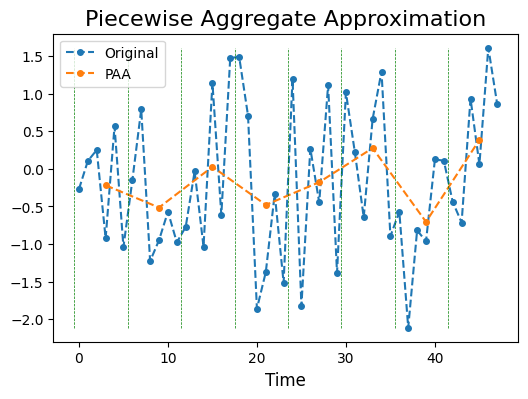

In [2]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import numpy as np
import matplotlib.pyplot as plt
from pyts.approximation import PiecewiseAggregateApproximation

# Parameters
n_samples, n_timestamps = 100, 48

# Toy dataset
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)

# PAA transformation
window_size = 6
paa = PiecewiseAggregateApproximation(window_size=window_size)
X_paa = paa.transform(X)

# Show the results for the first time series
plt.figure(figsize=(6, 4))
plt.plot(X[0], 'o--', ms=4, label='Original')
plt.plot(np.arange(window_size // 2,
                   n_timestamps + window_size // 2,
                   window_size), X_paa[0], 'o--', ms=4, label='PAA')
plt.vlines(np.arange(0, n_timestamps, window_size) - 0.5,
           X[0].min(), X[0].max(), color='g', linestyles='--', linewidth=0.5)
plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=12)
plt.title('Piecewise Aggregate Approximation', fontsize=16)
plt.show()

In [6]:
X[1]

array([-0.98520304, -0.95836832,  0.44910865, -0.94246256,  0.15890945,
        0.38807562,  0.43733776,  0.41822955, -0.73218499, -1.42828297,
       -2.00921735, -0.23343958,  1.80395237, -1.94867066,  1.36785101,
       -1.85873942, -1.23395073, -0.50756976,  1.4071715 , -0.94109705,
        0.87350473,  1.13510019,  1.1659844 ,  0.04921449,  0.51094674,
        0.63129939,  0.88770207,  0.05765164, -0.32954444, -2.83207869,
       -1.18255366, -0.05484602,  1.24835183,  2.51034292, -0.17133646,
       -0.45805514, -1.33878152,  1.32006292, -1.40932928, -1.09829722,
       -0.48675106, -1.00097056,  1.77387679,  0.55578305, -0.54871197,
        1.08001575, -0.75243358,  1.15879497])